In [1]:
#packages
import pandas as pd


###Reading in Flu text files, making them csv files and re-labeling them

	- not related vs related
			- related removed because most related appear afterward in other 2 datasets

	- infection vs awareness
			- infection removed because infection its covered by self vs others after

	- self vs others
			- changed others label from 0 to 2 and self label from 1 to 3
  
Final labels:

- 0: not related
- 1: awareness
- 2: others
- 3: self


### Working with 2009 Flu Data

In [2]:
RvNR2009 = pd.read_csv (r'/content/RelatedVsNotRelated2009TweetIDs.txt', delimiter = '	')
RvNR2009.columns = ['Tweet ID', 'Label']
RvNR2009['Disease'] = 'Influenza' 
onlyNR = RvNR2009.query("Label == 0")

In [3]:
AvI2009 = pd.read_csv (r'/content/AwarenessVsInfection2009TweetIDs.txt', delimiter = '	')
AvI2009.columns = ['Tweet ID', 'Label']
AvI2009['Disease'] = 'Influenza' 
onlyA = AvI2009.query("Label == 1")

In [4]:
SvO2009 = pd.read_csv (r'/content/SelfVsOthers2009TweetIDs.txt', delimiter = '	')
SvO2009.columns = ['Tweet ID', 'Label']

SvO2009['Disease'] = 'Influenza' 
for index, row in SvO2009.iterrows():
  if (row["Label"]) == 0:
    SvO2009.at[index, "Label"] = 2
  elif (row["Label"]) == 1:
    SvO2009.at[index, "Label"] = 3

In [5]:
final2009 = pd.concat([onlyNR, onlyA, SvO2009], ignore_index=True)
final2009 = final2009.drop_duplicates(ignore_index=True, keep='last')
swap_list = ['Tweet ID', 'Disease', 'Label']
final2009 = final2009.reindex(columns=swap_list)

In [6]:
final2009.to_csv (r'/content/final2009.csv', index=None)
final2009

,Tweet ID,Disease,Label
0,6003455112,Influenza,0
1,6002109706,Influenza,0
2,5990850113,Influenza,0
3,5990798305,Influenza,0
4,4636047505,Influenza,0
...,...,...,...
4232,5126038412,Influenza,2
4233,5410094700,Influenza,2
4234,4648001506,Influenza,2
4235,5291655108,Influenza,2


###Working with 2012 Flu Data

In [7]:
RvNR2012 = pd.read_csv (r'/content/RelatedVsNotRelated2012TweetIDs.txt', delimiter = '	')
RvNR2012.columns = ['Tweet ID', 'Label']
RvNR2012['Disease'] = 'Influenza' 
onlyNR = RvNR2012.query("Label == 0")

In [8]:
AvI2012 = pd.read_csv (r'/content/AwarenessVsInfection2012TweetIDs.txt', delimiter = '	')
AvI2012.columns = ['Tweet ID', 'Label']
AvI2012['Disease'] = 'Influenza' 
onlyA = AvI2012.query("Label == 1")

In [9]:
SvO2012 = pd.read_csv (r'/content/SelfVsOthers2012TweetIDs.txt', delimiter = '	')
SvO2012.columns = ['Tweet ID', 'Label']

SvO2012['Disease'] = 'Influenza' 
for index, row in SvO2012.iterrows():
  if (row["Label"]) == 0:
    SvO2012.at[index, "Label"] = 2
  elif (row["Label"]) == 1:
    SvO2012.at[index, "Label"] = 3

In [10]:
final2012 = pd.concat([onlyNR, onlyA, SvO2012], ignore_index=True)
final2012 = final2012.drop_duplicates(ignore_index=True, keep='last')
swap_list = ['Tweet ID', 'Disease', 'Label']
final2012 = final2012.reindex(columns=swap_list)

In [11]:
final2012.to_csv (r'/content/final2012.csv', index=None)
final2012

,Tweet ID,Disease,Label
0,4063122008,Influenza,0
1,4063124211,Influenza,0
2,4063623202,Influenza,0
3,4063915008,Influenza,0
4,4066673901,Influenza,0
...,...,...,...
3987,4812604309,Influenza,3
3988,4812950000,Influenza,2
3989,4813405606,Influenza,3
3990,4814093314,Influenza,2


###Combining 2009 and 2012 Flu Data

In [12]:
all_flu = pd.concat([final2009, final2012], ignore_index=True)
all_flu = all_flu.drop_duplicates(ignore_index=True, keep='last')

In [13]:
all_flu.to_csv (r'/content/all_flu.csv', index=None)
all_flu

,Tweet ID,Disease,Label
0,6003455112,Influenza,0
1,6002109706,Influenza,0
2,5990850113,Influenza,0
3,5990798305,Influenza,0
4,5989668305,Influenza,0
...,...,...,...
8055,4812604309,Influenza,3
8056,4812950000,Influenza,2
8057,4813405606,Influenza,3
8058,4814093314,Influenza,2


###Working with phm2017 data: change to csv 

Labels:
* 0: non-health
* 1: awareness
* 2: other-mention
* 3: self-mention


In [14]:
#phm2017 read in and change to csv

phm2017_read = pd.read_csv ('/content/PHM2017.txt', delimiter = '	')
phm2017_read.columns = ['Tweet ID', 'Disease', 'Label']
phm2017_read.to_csv (r'/content/PHM2017.csv', index=None)


In [15]:
phm2017_read

,Tweet ID,Disease,Label
0,811746810733723649,alzheimer,1
1,902649153792098304,alzheimer,1
2,811695298359783424,alzheimer,0
3,811696543501864961,alzheimer,1
4,813212976257896449,alzheimer,1
...,...,...,...
7186,813207357689892864,stroke,3
7187,903019970292060169,stroke,0
7188,902668028055175168,stroke,1
7189,902669513962991616,stroke,0


- counts
(counts of disease, labelling within them, total label (without taking disease into mind)


In [16]:
# all-flu data counts
print ("all_flu labels:")
print(all_flu['Label'].value_counts())

print ("phm2017 disease:")
print(phm2017_read['Disease'].value_counts())

print ("phm2017 labels:")
print(phm2017_read['Label'].value_counts())

print("phm2017 labels in diseases")
print("alzheimers labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'alzheimer']
print(temp['Label'].value_counts())


print("cancer labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'cancer']
print(temp['Label'].value_counts())

print("stroke labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'stroke']
print(temp['Label'].value_counts())

print("heart attack labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'heart attack']
print(temp['Label'].value_counts())

print("depression labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'depression']
print(temp['Label'].value_counts())

print("parkinson labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'parkinson']
print(temp['Label'].value_counts())

#graph it
# %'s + distribution of labels

all_flu labels:
0    2698
3    2314
1    2027
2    1021
Name: Label, dtype: int64
phm2017 disease:
alzheimer       1255
cancer          1242
stroke          1222
heart attack    1219
depression      1213
parkinson       1040
Name: Disease, dtype: int64
phm2017 labels:
1    3601
0    2178
2     813
3     599
Name: Label, dtype: int64
phm2017 labels in diseases
alzheimers labels
1    1004
2     212
0      26
3      13
Name: Label, dtype: int64
cancer labels
1    771
2    221
0    211
3     39
Name: Label, dtype: int64
stroke labels
0    701
1    353
2    137
3     31
Name: Label, dtype: int64
heart attack labels
0    855
1    207
2    109
3     48
Name: Label, dtype: int64
depression labels
1    594
3    449
0    130
2     40
Name: Label, dtype: int64
parkinson labels
1    672
0    255
2     94
3     19
Name: Label, dtype: int64


all_flu labels:
   Label  Count
0      0   2698
2      1   2027
3      2   1021
1      3   2314
distribution:
[0.3347394540942928, 0.2514888337468983, 0.12667493796526055, 0.2870967741935484]


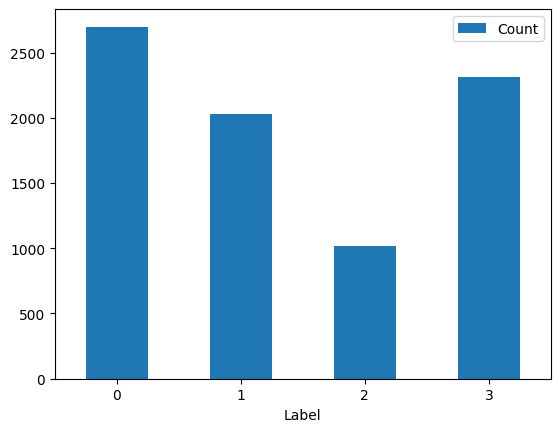

In [56]:
print ("all_flu labels:")
flu_disease = ['0', '1', '2', '3']
df = all_flu['Label'].value_counts()
df = df.reset_index()
df.columns = ['Label', 'Count']
df2 = df.sort_values('Label')
print(df2)
flu_disease_count = df2.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'Label': flu_disease, 'Count':flu_disease_count})
ax = df.plot.bar(x='Label', y='Count', rot=0)

print('distribution:')
total = df2['Count'].sum() 
dist = []
for index, row in df2.iterrows():
  dist.append(row['Count']/total)
print(dist)

phm2017 disease:
          index  Disease
0     alzheimer     1255
1        cancer     1242
2        stroke     1222
3  heart attack     1219
4    depression     1213
5     parkinson     1040
distribution:
[0.17452371019329718, 0.17271589486858574, 0.16993464052287582, 0.16951745237101934, 0.16868307606730634, 0.1446252259769156]


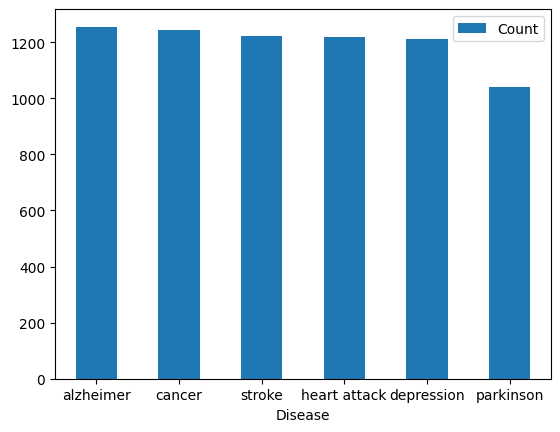

In [59]:
print ("phm2017 disease:")
phm2017_disease = ['alzheimer', 'cancer', 'stroke', 'heart attack', 'depression', 'parkinson']
df = phm2017_read['Disease'].value_counts()
df = df.reset_index()
print(df)
df.columns = ['Disease', 'Count']
phm2017_disease_count = df.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'Disease': phm2017_disease, 'Count':phm2017_disease_count})
ax = df.plot.bar(x='Disease', y='Count', rot=0)

print('distribution:')
total = df['Count'].sum() 
dist = []
for index, row in df.iterrows():
  dist.append(row['Count']/total)
print(dist)

phm2017 labels:
   Label  Count
1      0   2178
0      1   3601
2      2    813
3      3    599
distribution:
[0.30287859824780977, 0.5007648449450702, 0.11305798915310805, 0.08329856765401196]


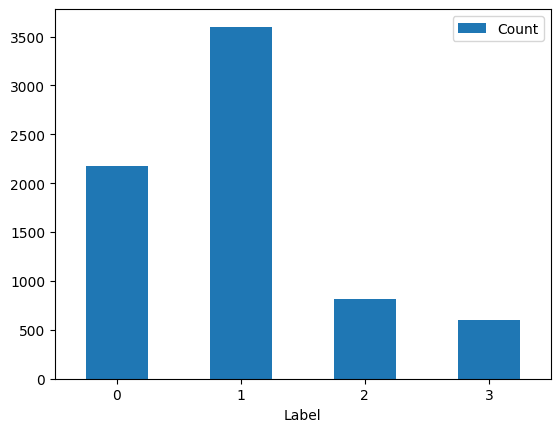

In [60]:
print ("phm2017 labels:")
phm2017_disease = ['0', '1', '2', '3']
df = phm2017_read['Label'].value_counts()
df = df.reset_index()
df.columns = ['Label', 'Count']
df2 = df.sort_values('Label')
print(df2)
phm2017_disease_count = df2.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'Label': phm2017_disease, 'Count':phm2017_disease_count})
ax = df.plot.bar(x='Label', y='Count', rot=0)

print('distribution:')
total = df2['Count'].sum() 
dist = []
for index, row in df2.iterrows():
  dist.append(row['Count']/total)
print(dist)

phm2017 labels in diseases
alzheimers labels
1    1004
2     212
0      26
3      13
Name: Label, dtype: int64
   Label  Count
2      0     26
0      1   1004
1      2    212
3      3     13
distribution:
[0.020717131474103586, 0.8, 0.16892430278884463, 0.010358565737051793]


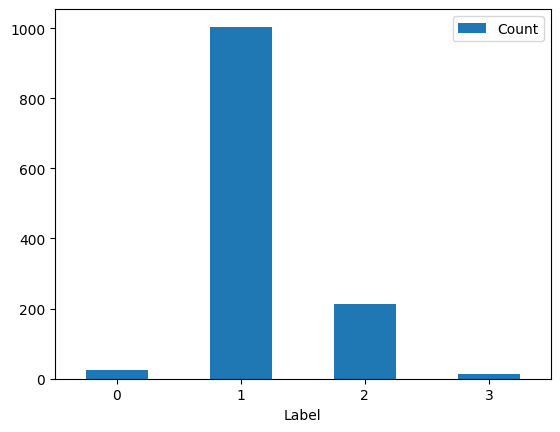

In [61]:
print("phm2017 labels in diseases")
print("alzheimers labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'alzheimer']
#print(temp['Label'].value_counts())

phm2017_disease = ['0', '1', '2', '3']
df = temp['Label'].value_counts()
df = df.reset_index()
df.columns = ['Label', 'Count']
df2 = df.sort_values('Label')
print(df2)
phm2017_disease_count = df2.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'Label': phm2017_disease, 'Count':phm2017_disease_count})
ax = df.plot.bar(x='Label', y='Count', rot=0)

print('distribution:')
total = df2['Count'].sum() 
dist = []
for index, row in df2.iterrows():
  dist.append(row['Count']/total)
print(dist)

cancer labels
1    771
2    221
0    211
3     39
Name: Label, dtype: int64
   Label  Count
2      0    211
0      1    771
1      2    221
3      3     39
distribution:
[0.16988727858293076, 0.6207729468599034, 0.177938808373591, 0.03140096618357488]


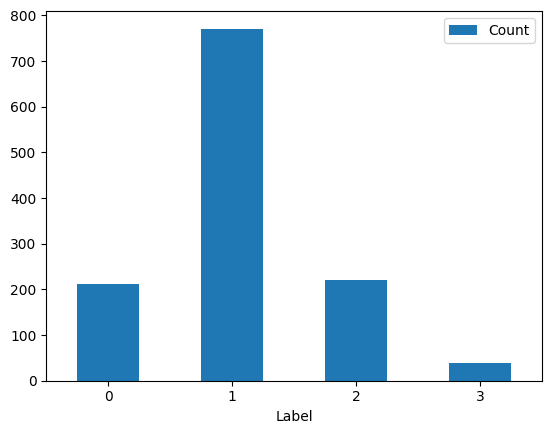

In [62]:
print("cancer labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'cancer']
#print(temp['Label'].value_counts())

phm2017_disease = ['0', '1', '2', '3']
df = temp['Label'].value_counts()
df = df.reset_index()
df.columns = ['Label', 'Count']
df2 = df.sort_values('Label')
print(df2)
phm2017_disease_count = df2.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'Label': phm2017_disease, 'Count':phm2017_disease_count})
ax = df.plot.bar(x='Label', y='Count', rot=0)

print('distribution:')
total = df2['Count'].sum() 
dist = []
for index, row in df2.iterrows():
  dist.append(row['Count']/total)
print(dist)

stroke labels
   Label  Count
0      0    701
1      1    353
2      2    137
3      3     31
distribution:
[0.5736497545008183, 0.2888707037643208, 0.11211129296235679, 0.02536824877250409]


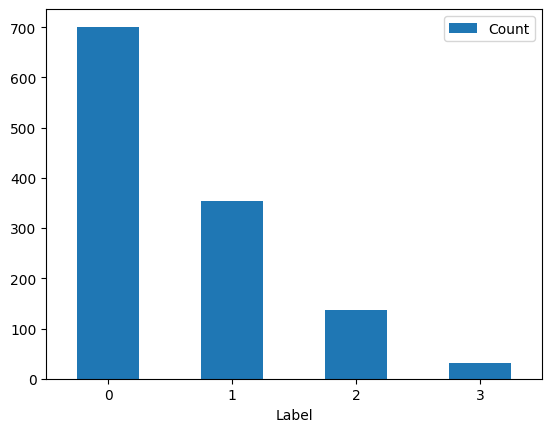

In [63]:
print("stroke labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'stroke']
#print(temp['Label'].value_counts())

phm2017_disease = ['0', '1', '2', '3']
df = temp['Label'].value_counts()
df = df.reset_index()
df.columns = ['Label', 'Count']
df2 = df.sort_values('Label')
print(df2)
phm2017_disease_count = df2.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'Label': phm2017_disease, 'Count':phm2017_disease_count})
ax = df.plot.bar(x='Label', y='Count', rot=0)

print('distribution:')
total = df2['Count'].sum() 
dist = []
for index, row in df2.iterrows():
  dist.append(row['Count']/total)
print(dist)

heart attack labels
   Label  Count
0      0    855
1      1    207
2      2    109
3      3     48
distribution:
[0.7013945857260049, 0.16981132075471697, 0.08941755537325677, 0.03937653814602133]


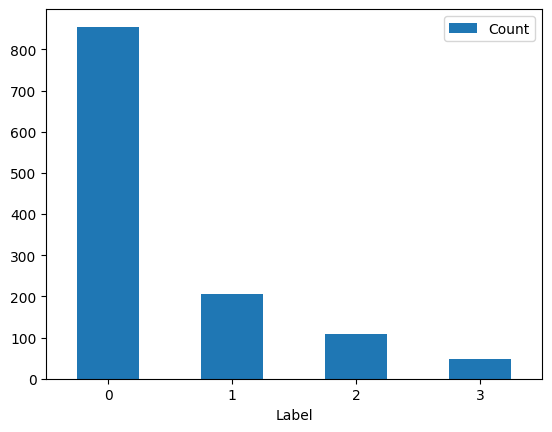

In [64]:
print("heart attack labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'heart attack']
#print(temp['Label'].value_counts())

phm2017_disease = ['0', '1', '2', '3']
df = temp['Label'].value_counts()
df = df.reset_index()
df.columns = ['Label', 'Count']
df2 = df.sort_values('Label')
print(df2)
phm2017_disease_count = df2.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'Label': phm2017_disease, 'Count':phm2017_disease_count})
ax = df.plot.bar(x='Label', y='Count', rot=0)

print('distribution:')
total = df2['Count'].sum() 
dist = []
for index, row in df2.iterrows():
  dist.append(row['Count']/total)
print(dist)

depression labels
   Label  Count
2      0    130
0      1    594
3      2     40
1      3    449
distribution:
[0.10717230008244023, 0.4896949711459192, 0.03297609233305853, 0.37015663643858204]


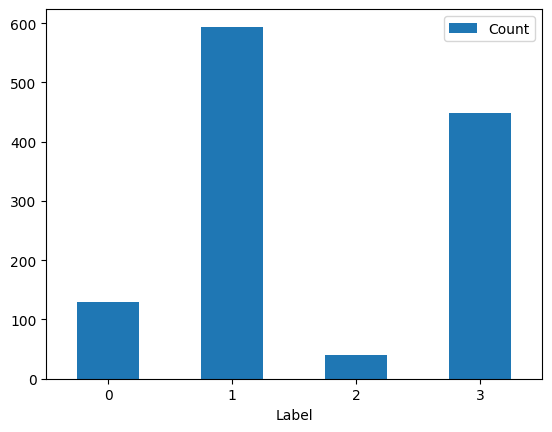

In [66]:
print("depression labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'depression']
#print(temp['Label'].value_counts())

phm2017_disease = ['0', '1', '2', '3']
df = temp['Label'].value_counts()
df = df.reset_index()
df.columns = ['Label', 'Count']
df2 = df.sort_values('Label')
print(df2)
phm2017_disease_count = df2.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'Label': phm2017_disease, 'Count':phm2017_disease_count})
ax = df.plot.bar(x='Label', y='Count', rot=0)

print('distribution:')
total = df2['Count'].sum() 
dist = []
for index, row in df2.iterrows():
  dist.append(row['Count']/total)
print(dist)

parkinson labels
   Label  Count
1      0    255
0      1    672
2      2     94
3      3     19
distribution:
[0.24519230769230768, 0.6461538461538462, 0.09038461538461538, 0.01826923076923077]


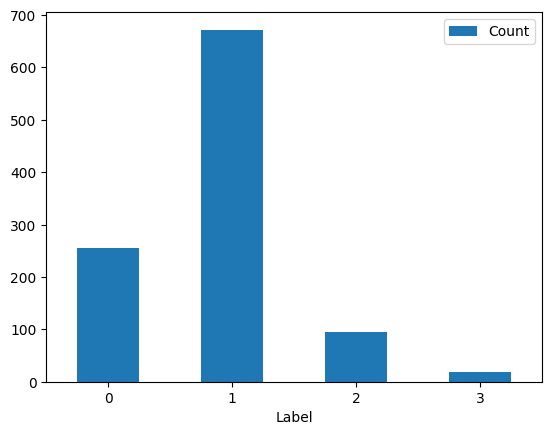

In [65]:
print("parkinson labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'parkinson']
#print(temp['Label'].value_counts())

phm2017_disease = ['0', '1', '2', '3']
df = temp['Label'].value_counts()
df = df.reset_index()
df.columns = ['Label', 'Count']
df2 = df.sort_values('Label')
print(df2)
phm2017_disease_count = df2.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'Label': phm2017_disease, 'Count':phm2017_disease_count})
ax = df.plot.bar(x='Label', y='Count', rot=0)

print('distribution:')
total = df2['Count'].sum() 
dist = []
for index, row in df2.iterrows():
  dist.append(row['Count']/total)
print(dist)